In [ ]:
'''
BMED318. Hands-on. Chapter 5-2 & Chapter 6. Image Geometry 
'''
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi


def imgray(image_list):
    plt.figure()
    for i in range(len(image_list)):
        plt.subplot(1,len(image_list),i+1)
        plt.imshow(image_list[i], cmap='gray')
        plt.axis('off')
    plt.show()

def make_grid2d(size):
    grid = np.linspace(-(size//2), (size//2), size)
    xx,yy = np.meshgrid(grid, grid)
    return xx,yy

def make_gaussain_mask2d(size, sigma):
    xx,yy = make_grid2d(size)
    mask2d = np.exp(-(xx**2 + yy**2) / (2*sigma**2))
    mask2d /= np.sum(mask2d)
    return mask2d

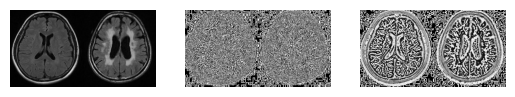

In [ ]:
''' 
1. LoG filter 
a) Load the image file ‘brain_whitenoise.jpg’. 
b) Apply a Laplacian filter with a kernel size of 5. 
c) Experiment with the Laplacian of Gaussian (LoG) filter by varying the parameters (kernel size and sigma), 
then select the combination that produces the best result. 
d) Display the original image, the Laplacian-filtered image, and the best LoG-filtered image together in the 
same window for comparison. 
'''
# a)
brain = plt.imread('brain_whitenoise.jpg')
# b)
lmask = np.array(
    [[0,0,-1,0,0],
    [0,-1,-2,-1,0],
    [-1,-2,16,-2,-1],
    [0,-1,-2,-1,0],
    [0,0,-1,0,0]]
    )
limg = ndi.convolve(brain,lmask)
# c)
size=7
sigma=1.5
gmask = make_gaussain_mask2d(size,sigma)
gimg = ndi.convolve(brain, gmask)
logimg = ndi.convolve(gimg, lmask)
# d)
imgray([brain, limg, logimg])

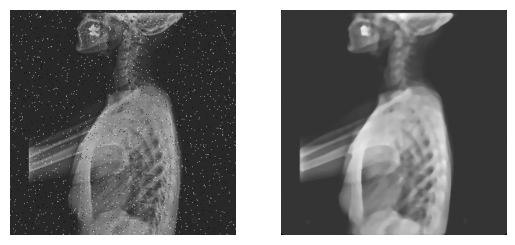

In [ ]:
'''
2. Median Filter 
a) Load the image file ‘sadimg.bmp’. 
b) Implement a custom median filtering function, median_filt(), and apply it to the image from step a). 
• Input: source image, filter size 
• Output: median-filtered image 
• Do not use any built-in Python library methods for median filtering such as 
skimage.ndimage.median_filter() or rank_filter(). 
c) Display both the original and the median-filtered image. 
'''
# a)
sadimg = plt.imread('sadimg.bmp')

# b)
def median_filt(image, size):
    
    pad_h = size[0] // 2
    pad_w = size[1] // 2
    
    image_padded = np.pad(image, pad_width=((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    filtered_image = np.zeros_like(image)
    
    height, width = image.shape
    
    for y in range(height):
        for x in range(width):
            neighborhood = image_padded[y : y + size[0], x : x + size[1]]
            
            median_value = np.median(neighborhood)
            filtered_image[y, x] = median_value
            
    return filtered_image

median_img = median_filt(sadimg, size = (7,7))
# c)
imgray([sadimg, median_img])

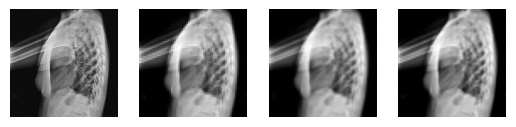

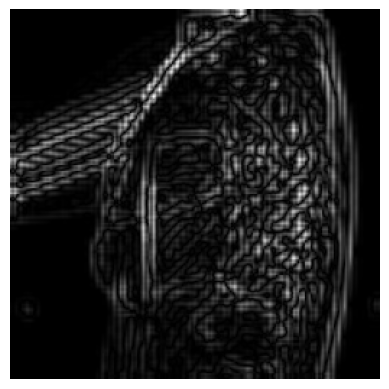

In [ ]:
'''
3. Interpolation 
a) Load the image file ‘body.jpg’. 
b) Resize the image from step a) to 64×64 pixels using bilinear interpolation. 
c) Resize the 64×64 image back to the original dimensions using three methods
    : nearest neighbor, bilinear, and bicubic interpolation. 
d) Display the original image and the three resized versions in the same figure window. 
e) Display a separate image showing the pixel-wise differences
    between the bilinear- and bicubic-resized images. 
'''
import skimage.transform as tr

# a
body_img = plt.imread('body.jpg')
#np.shape(body_img) 256x256

# b
inter_img1 = tr.rescale(body_img, 0.25, order=1)

# c
inter_img2 = tr.rescale(inter_img1, 4, order=0) # nearest neighbor
inter_img3 = tr.rescale(inter_img1, 4, order=1) # bilinear
inter_img4 = tr.rescale(inter_img1, 4, order=2) # bicubic

# d
imgray([body_img, inter_img2, inter_img3, inter_img4])

# e 
differ_img = np.abs(inter_img3 - inter_img4)
imgray([differ_img])

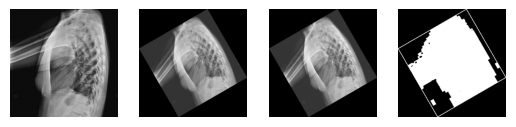

In [ ]:
'''
4. Rotation 
a) Load the image file ‘body.jpg’. 
b) Rotate the image by 30 degrees using both nearest neighbor and bicubic interpolation methods. 
c) Display the original image, the rotated images, and a difference image highlighting the pixel-wise changes 
between the two rotated versions. Convert the difference image to black and white, where all zero values 
appear black and all other pixel values appear white. 
'''
import skimage.transform as tr

# a
body_img = plt.imread('body.jpg')

# b
rotate_img1 = tr.rotate(body_img, 30, order=0, resize=True, preserve_range=True)
rotate_img2 = tr.rotate(body_img, 30, order=3, resize=True, preserve_range=True)

# c 
rotate_differ = np.abs(rotate_img1 - rotate_img2)
bw_rotate_differ = (rotate_differ !=0).astype(float)
imgray([body_img, rotate_img1, rotate_img2, bw_rotate_differ])

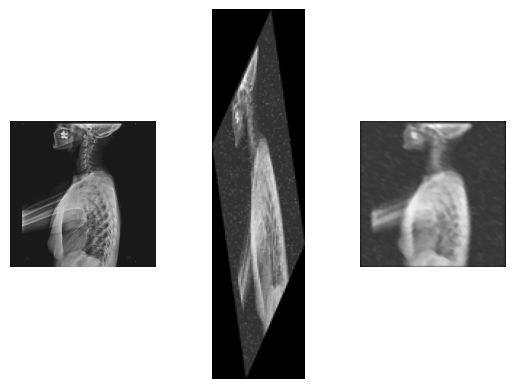

In [ ]:
'''
5. Image geometry 
a) Load the image file ‘sadimg2.bmp’. 
b) The image in step a) was generated through the following processes: 
① Addition of salt & pepper noise 
② Rotation by 30 degrees using bicubic interpolation 
③ Size reduction to 256 × 64 
c) Restore the processed image to resemble the original ‘img.jpg’ as closely as possible. 
d) Display the original image, the processed image (‘sadimg2.bmp’), and the restored image together in the 
same figure window. 
'''
# a
sadimg2 = plt.imread('sadimg2.bmp')
originalimg = plt.imread('img.jpg')



# b, c

processed1 = tr.resize(sadimg2, output_shape=(478,478), preserve_range=True)

#tr.resize(sadimg2, originalimg.shape, order=3, preserve_range=True)
processed2 = tr.rotate(processed1, -30, order=3, preserve_range=True)


h_orig, w_orig = originalimg.shape
h_rot, w_rot = processed2.shape

h_start = (h_rot - h_orig) // 2
w_start = (w_rot - w_orig) // 2
processed3 = processed2[h_start : h_start + h_orig, w_start : w_start + w_orig] 
#imgray([originalimg, sadimg2, processed1, processed2, processed3])
processed4 = median_filt(processed3, (7,7))


# d
imgray([originalimg, sadimg2, processed4])

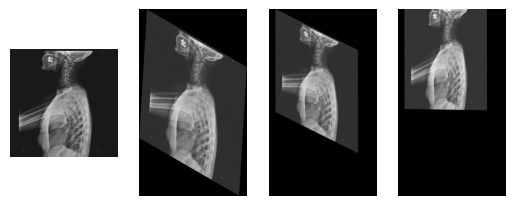

In [ ]:
'''
6. Image geometry: Affine transform 
a) Load the image files ‘img.jpg’ (original) and ‘affined_img.bmp’ (affine-transformed). 
b) Apply an appropriate inverse affine transformation to ‘affined_img.bmp’ to reconstruct an image as close as 
possible to the original ‘img.jpg’. 
c) Display all three images—the original, the affine-transformed, and the restored—in a single figure window 
for comparison. 
'''
# a
original_img = plt.imread('img.jpg')
affined_img = plt.imread('affined_img.bmp')

# b
rot_rad = -3.5*(np.pi/180)
tform = tr.AffineTransform(rotation =rot_rad, scale=(0.8,0.8), )
restored_img1 = tr.warp(affined_img, tform.inverse)

ttform = tr.AffineTransform(shear=(0,0.45))
restored_img2 = tr.warp(restored_img1, ttform.inverse)

# c
imgray([original_img, affined_img, restored_img1, restored_img2])